# 17기 KNN 정규세션 과제

## KNN 구현해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. KNN 구현 & 파라미터 튜닝
수업 내용 및 실습 자료를 참고하여 KNN을 구현하고 파라미터 튜닝을 하며 결과를 비교해주세요.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [blackfriday | Kaggle](https://www.kaggle.com/llopesolivei/blackfriday)

---

## 0. 데이터 불러오기

(1) 구글 드라이브 연동하기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(2) 필요한 module 불러오기

In [ ]:
# import module
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor, DistanceMetric, NearestNeighbors

from collections import Counter

from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

(3) 데이터 불러오기

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ToBigs/KNN/blackfriday.csv", index_col = 0)
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780


## 1. Preprocssing / EDA

### 1-1. 데이터 확인하기



(1) 데이터 이해하기

> **Traget 변수**

- `Purchase` : 구매한 개수


> **설명 변수**

- `User_ID` : 고객 ID
- `Product_ID` : 제품 ID
- `Gender` : 성별 (F : 여성 / M : 남성)
- `Age` : 나이대 
- `Occupation` : 직업 (1-10)
- `City_Category` : 거주 도시 (A / B / C)
- `Stay_In_Current_City_Years` : 현재 도시 거주 년수
- `Marital_Status` : 기혼 상태 (0 : 미혼 / 1 : 기혼)
- `Product_Category_1` : 제품 분류 1
- `Product_Category_2` : 제품 분류 2
- `Product_Category_3` : 제품 분류 3

(2) 전체 데이터 확인하기

In [ ]:
data.shape

(4998, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     4998 non-null   int64  
 1   Product_ID                  4998 non-null   object 
 2   Gender                      4998 non-null   object 
 3   Age                         4998 non-null   object 
 4   Occupation                  4998 non-null   int64  
 5   City_Category               4998 non-null   object 
 6   Stay_In_Current_City_Years  4998 non-null   object 
 7   Marital_Status              4998 non-null   int64  
 8   Product_Category_1          4998 non-null   int64  
 9   Product_Category_2          3465 non-null   float64
 10  Product_Category_3          1544 non-null   float64
 11  Purchase                    4998 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 507.6+ KB


In [ ]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,4.998000e+03,4998.000000,4998.000000,4998.000000,3465.000000,1544.000000,4998.000000
mean,1.003015e+06,8.036815,0.421369,5.320128,9.773737,12.766839,9234.655462
std,1.709910e+03,6.442697,0.493828,3.912281,5.101867,4.023591,4999.225081
min,1.000003e+06,0.000000,0.000000,1.000000,2.000000,3.000000,13.000000
25%,1.001560e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5497.750000
50%,1.003040e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8049.000000
75%,1.004417e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12039.000000
max,1.006037e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23913.000000


In [ ]:
for col in data.columns:
    print(data[col].value_counts())
    print('*' * 50)

1002063    12
1005795    12
1001980    11
1004344    11
1006036    10
           ..
1004980     1
1004385     1
1004138     1
1002648     1
1000837     1
Name: User_ID, Length: 2656, dtype: int64
**************************************************
P00265242    21
P00220442    16
P00114942    15
P00010742    15
P00148642    15
             ..
P00072342     1
P00037842     1
P00207042     1
P00129742     1
P00358242     1
Name: Product_ID, Length: 1797, dtype: int64
**************************************************
M    3765
F    1233
Name: Gender, dtype: int64
**************************************************
26-35    1996
36-45    1000
18-25     906
46-50     414
51-55     350
55+       195
0-17      137
Name: Age, dtype: int64
**************************************************
4     706
0     572
7     535
1     460
17    339
12    305
20    285
2     251
14    245
16    244
6     186
3     160
15    133
10    122
5      98
11     95
19     73
13     65
18     56
9      50
8      18


(3) 결측치 확인하기

In [ ]:
data.isnull().sum()

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            1533
Product_Category_3            3454
Purchase                         0
dtype: int64

**Output**

- `Product_Category_2`, `Product_Category_3`에 NaN값이 존재하므로 **결측치를 처리**하는 과정이 필요하다.
- *int*값인 `Product_Category_1`과 달리 `Product_Category_2`, `Product_Category_3`의 값은 *float*값이다.
- `Gender`, `Age`, `City_Category`, `Stay_In_Current_City_Years`와 같이 *object*로 되어있는 값들을 KNN 모델에 적용하기위해 **one-hot encoding**을 적용하는 과정이 필요하다.

(4) 이상치 확인하기

In [ ]:
# dataframe으로 변환
df = pd.DataFrame(data)

In [ ]:
# user ID 제거
df_user = df.drop(columns='User_ID')

df_user

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780
...,...,...,...,...,...,...,...,...,...,...,...
4993,P00147942,M,55+,7,C,1,1,1,16.0,NaN,11701
4994,P00358242,M,55+,1,C,1,1,8,NaN,NaN,2045
4995,P00173342,M,55+,13,C,3,1,1,6.0,14.0,4505
4996,P00336742,M,55+,0,C,2,1,12,NaN,NaN,1413


Text(0.5, 0.98, 'Histogram')

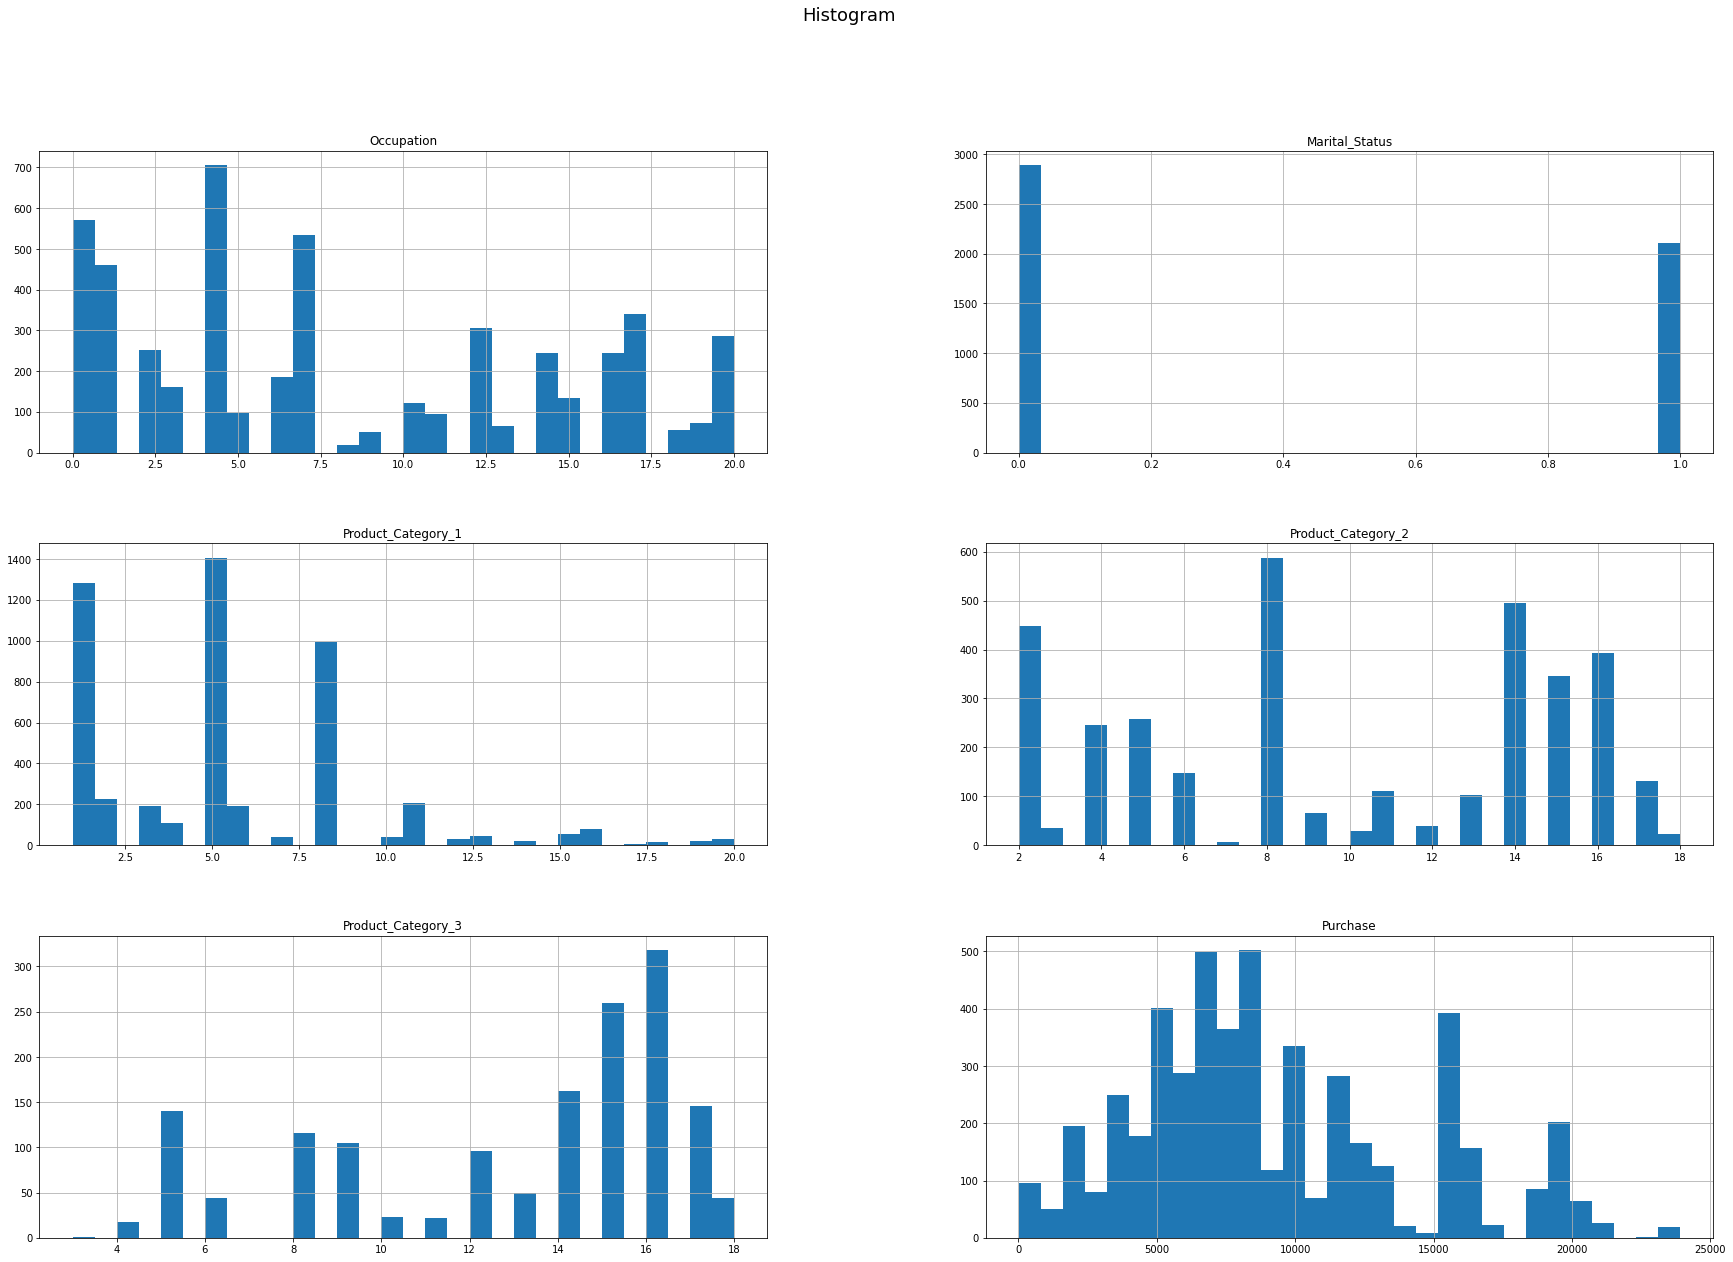

In [ ]:
# 이상치 탐지
df_user.hist(bins=30, figsize=(30,20))
plt.suptitle("Histogram", fontsize=18)

**Output**

- `Marital_Status`는 기혼 상태를 나타내는 항목이므로, 0 또는 1의 값을 가진다.
- 각 항목에 대한 이상치가 보이지 않는다.

### 1-2. 데이터 EDA하기

(1) 각 변수 간 상관관계 확인하기

In [ ]:
# check correlation
df.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.027100,0.029083,-0.003481,-0.002472,-0.016563,0.016931
Occupation,-0.027100,1.000000,0.028712,-0.005366,0.015663,0.010676,0.032258
Marital_Status,0.029083,0.028712,1.000000,0.020386,0.043645,0.071383,0.002917
Product_Category_1,-0.003481,-0.005366,0.020386,1.000000,0.523190,0.219465,-0.346402
Product_Category_2,-0.002472,0.015663,0.043645,0.523190,1.000000,0.532458,-0.191558
Product_Category_3,-0.016563,0.010676,0.071383,0.219465,0.532458,1.000000,-0.019311
Purchase,0.016931,0.032258,0.002917,-0.346402,-0.191558,-0.019311,1.000000


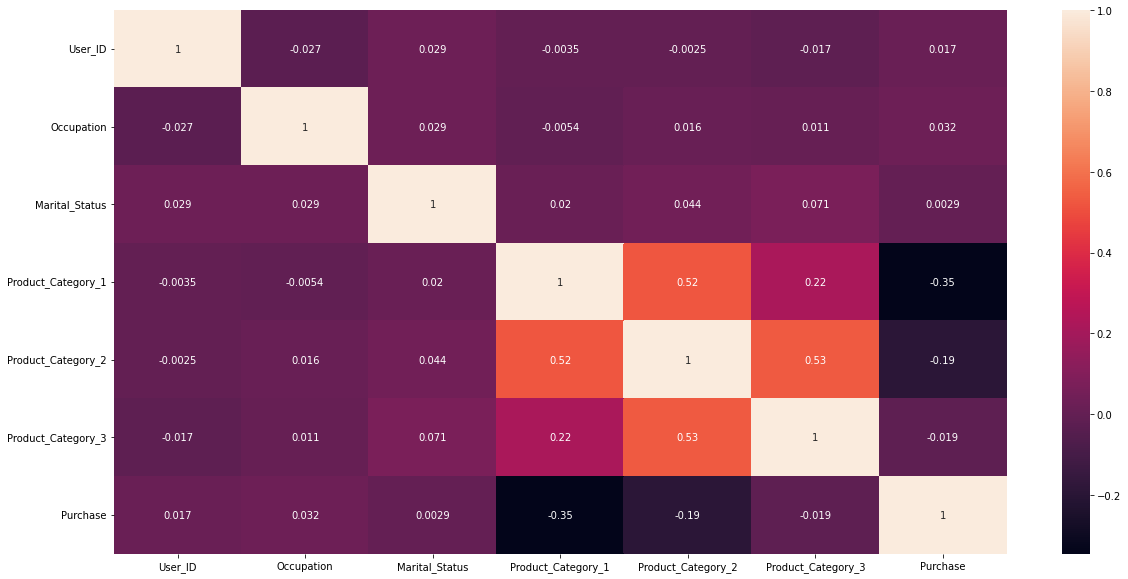

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

(2) 각 Column값 EDA하기

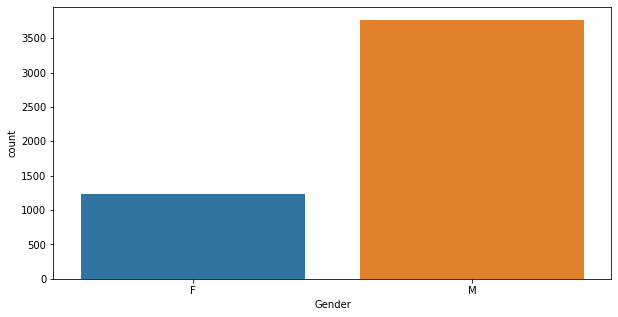

In [ ]:
# Gender
plt.figure(figsize= (10,5))
sns.countplot(df['Gender'])

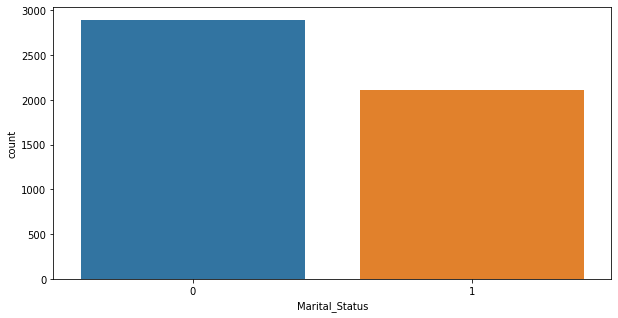

In [ ]:
# Marital_Status (0:single / 1:married)
plt.figure(figsize= (10,5))
sns.countplot(df['Marital_Status'])

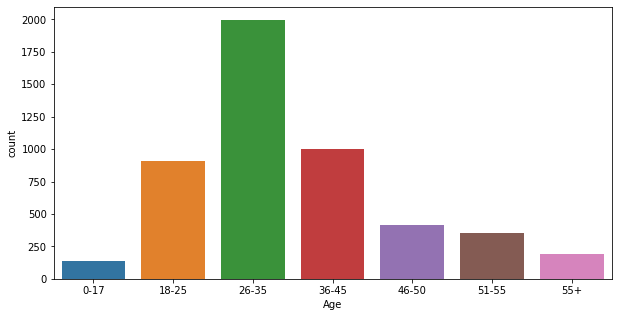

In [ ]:
# Age
plt.figure(figsize= (10,5))
sns.countplot(df['Age'])

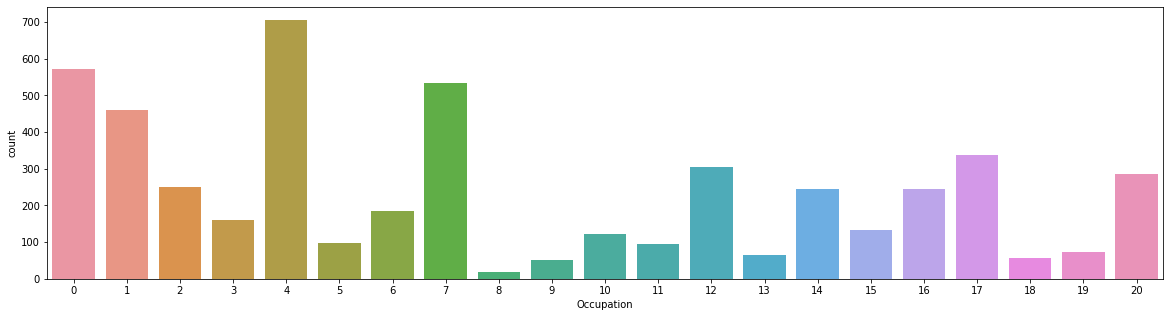

In [ ]:
# Occupation
plt.figure(figsize= (20,5))
sns.countplot(df['Occupation'])

해당 숫자가 어떤 직업을 의미하는지 알지 못하므로, `Occupation`값을 이용한 정확한 데이터 분석 진행이 어렵다.

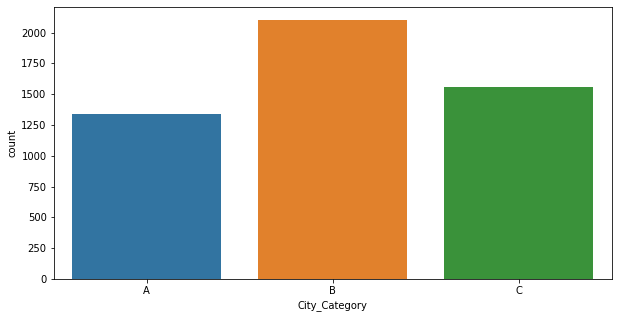

In [ ]:
# City category
plt.figure(figsize= (10,5))
sns.countplot(df['City_Category'])

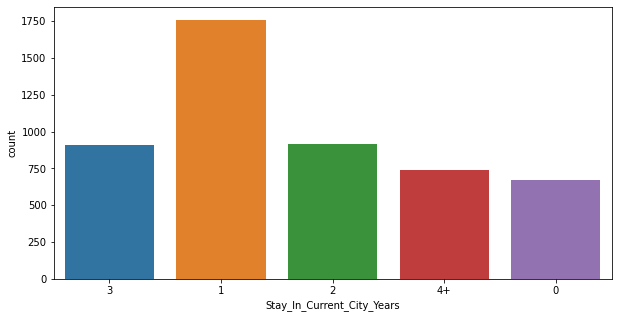

In [ ]:
# Stay in current city years
plt.figure(figsize= (10,5))
sns.countplot(df['Stay_In_Current_City_Years'])

**Output**

- 여성보다 남성의 구매율이 더 높다.
- 기혼자보다 미혼자의 구매율이 더 높다.
- 26-35세의 사람의 구매율이 가장 높다.
- B지역에 거주하는 사람의 구매율이 가장 높다.
- 현재 지역에 1년 정도 거주한 사람들의 구매율이 가장 높다. 

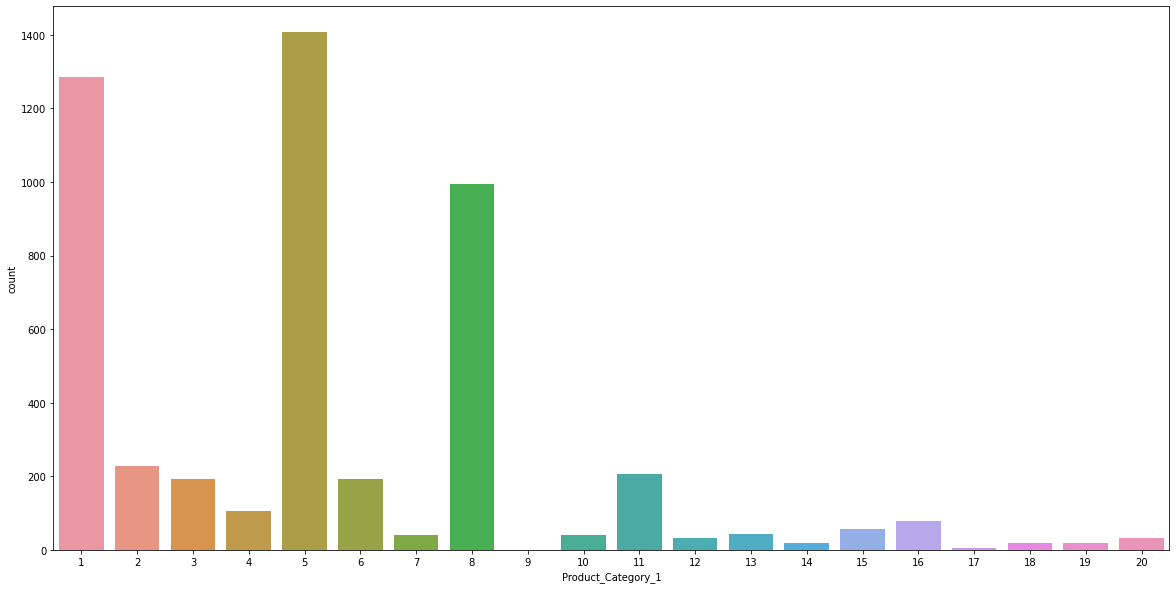

In [ ]:
# Product_Category_1
plt.figure(figsize=(20,10))
sns.countplot(x = 'Product_Category_1',data = df)

**Output**

`Product_Category_1`에서는 1, 5, 8의 개수가 가장 많다.

(3) 서로 다른 변수들 EDA하기

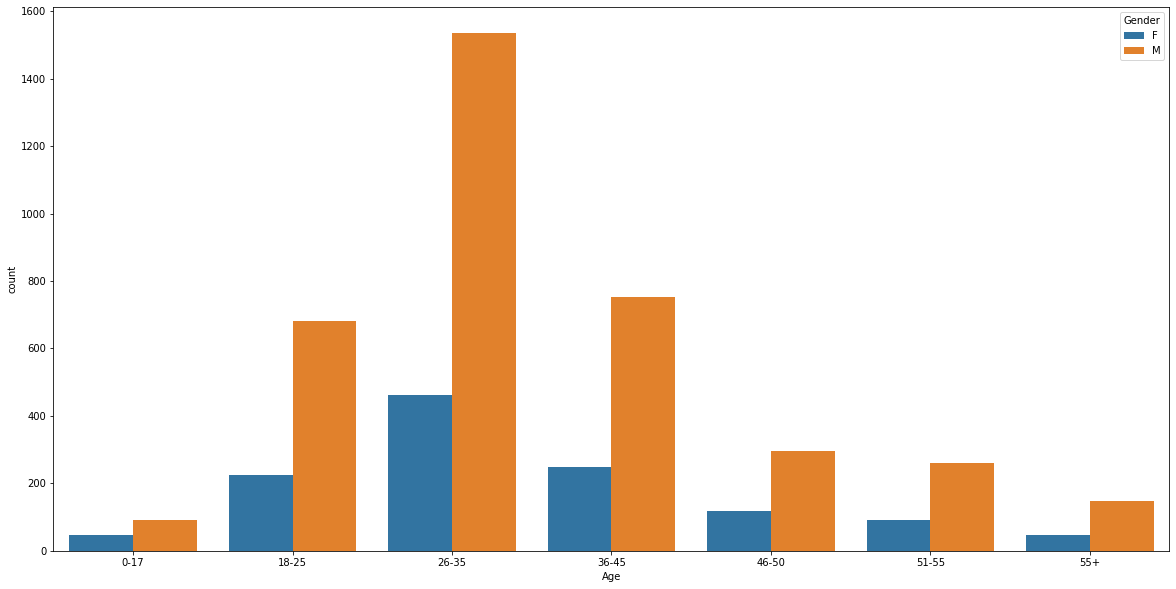

In [ ]:
# Age & Gender
plt.figure(figsize= (20,10))
sns.countplot(df['Age'],hue=df['Gender'])

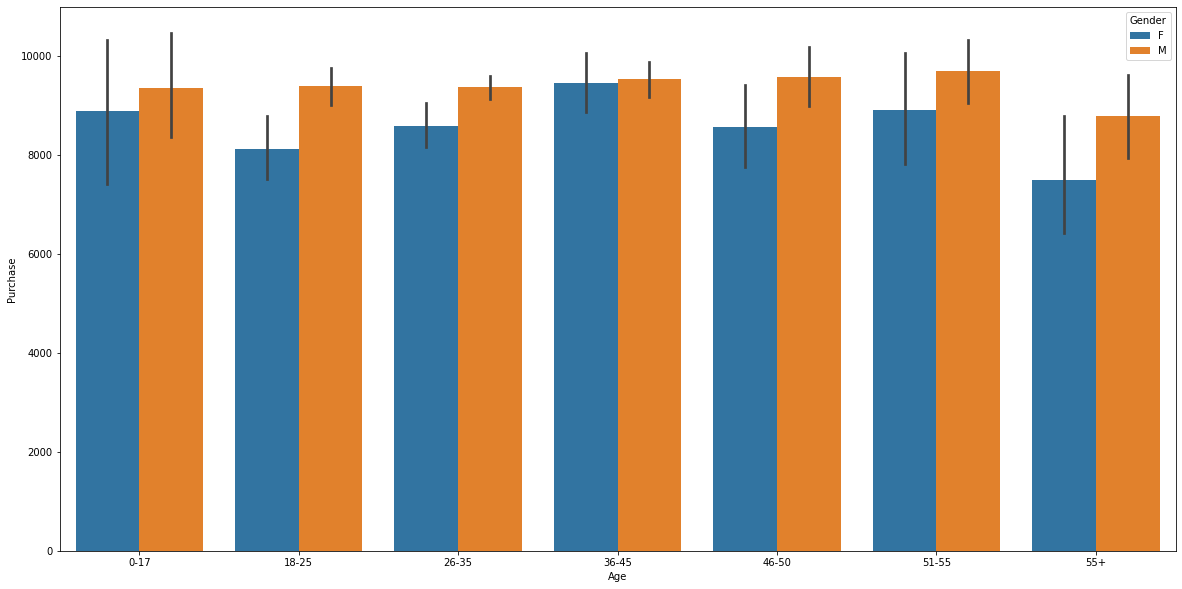

In [ ]:
# Age & Gender & Purchase
plt.figure(figsize = (20,10))
sns.barplot(x='Age', y='Purchase',hue = 'Gender',data= df)

**Output**

대체로 Female과 Male의 분포가 비슷하다. 따라서 `Gender`보다 `Age`에 따른 경향성이 더 커보였으나, 실제 `Purchase`와 비교하면, `Gender`와 `Age`에 대한 차이가 크지 않으므로 두 값 모두 큰 영향을 끼치지 못함을 알 수 있다.

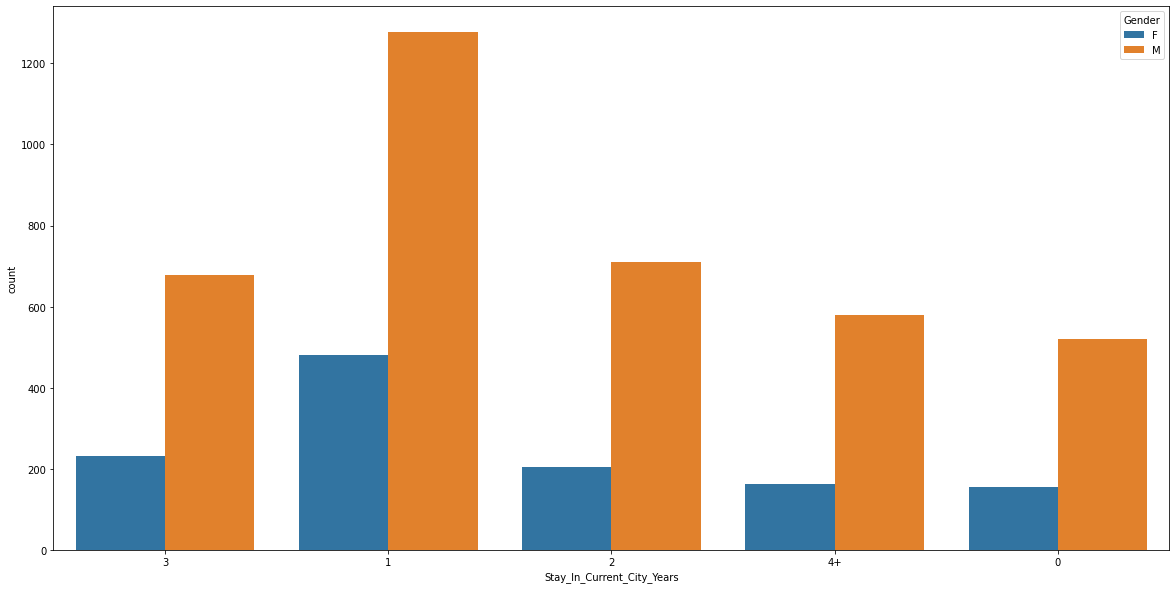

In [ ]:
# Gender & Stay in current city years
plt.figure(figsize= (20,10))
sns.countplot(data=df,x='Stay_In_Current_City_Years',hue='Gender')

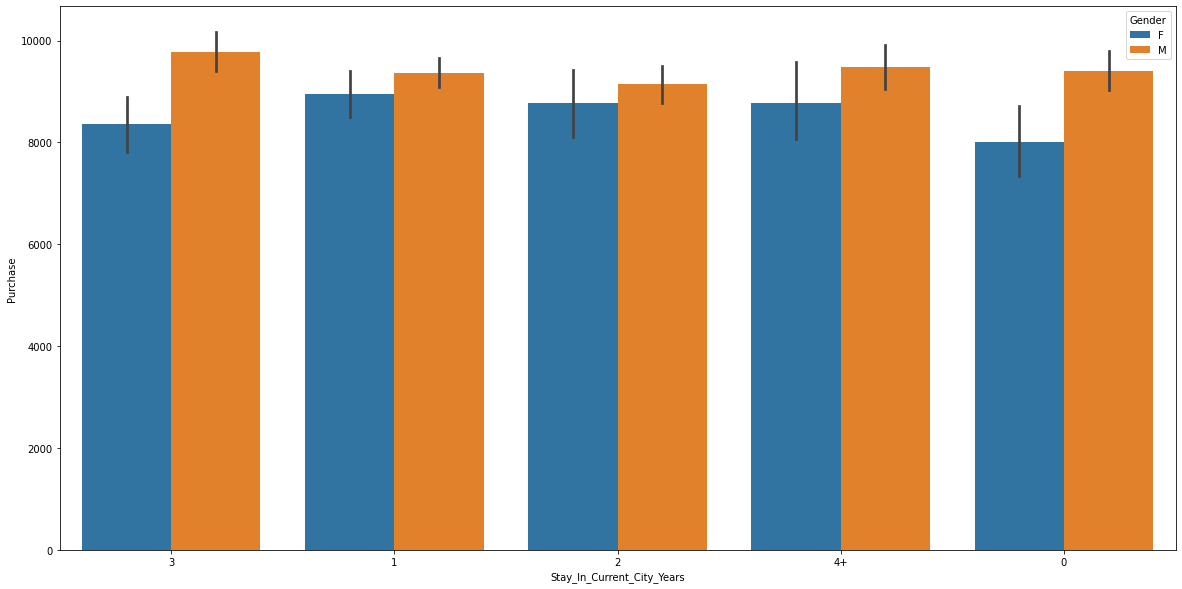

In [ ]:
# Stay in current city years & Gender & Purchase
plt.figure(figsize = (20,10))
sns.barplot(x='Stay_In_Current_City_Years', y='Purchase',hue = 'Gender',data= df)

**Output**

대체로 Female과 Male의 분포가 비슷하다. 따라서 `Gender`보다 `Stay_In_Current_City_Years`에 따른 경향성이 더 커보였으나, 실제 `Purchase`와 비교하면, `Gender`와 `Stay_In_Current_City_Years`에 대한 차이가 크지 않으므로 두 값 모두 큰 영향을 끼치지 못함을 알 수 있다.

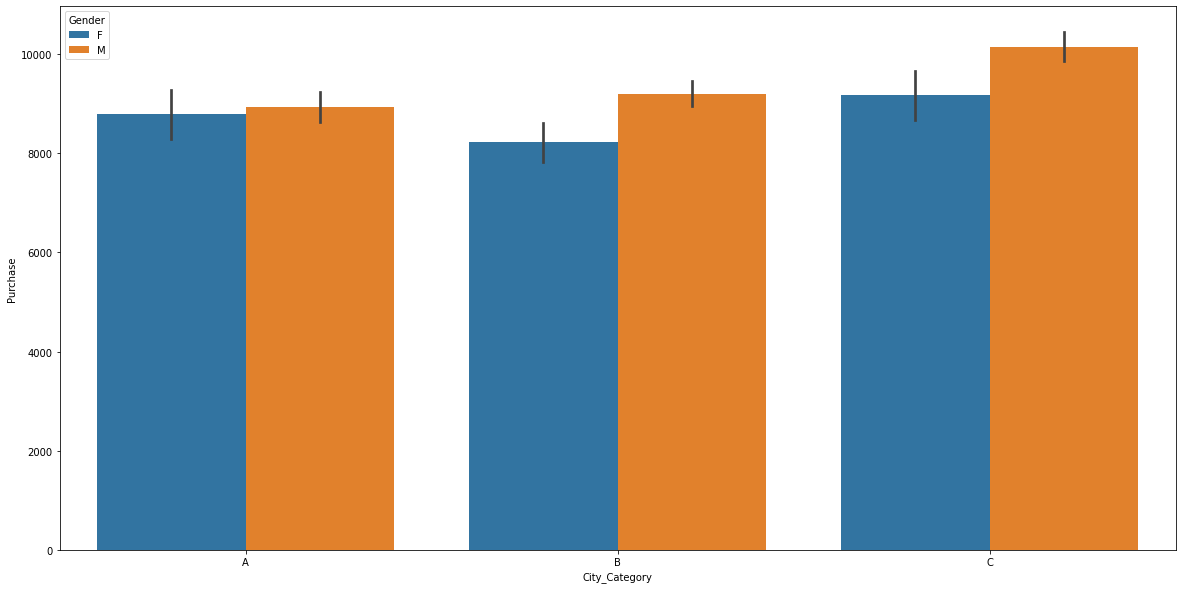

In [ ]:
# City category & Gender & Purchase
plt.figure(figsize = (20,10))
sns.barplot(x='City_Category', y='Purchase',hue = 'Gender',data= df)

(4) Target 변수 확인하기

### 1-3. 데이터 전처리하기

(1) 결측치 처리하기

  (결측치를 채우는 부분이 부족하여, 16기 이예림님의 우수코드를 참고했습니다.)

- `User_ID`

  Target 변수 예측에 불필요한 column인 `User_ID`를 제거한다.

In [ ]:
# df_1 = df.drop(columns='User_ID')

# df_1

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780
...,...,...,...,...,...,...,...,...,...,...,...
4993,P00147942,M,55+,7,C,1,1,1,16.0,NaN,11701
4994,P00358242,M,55+,1,C,1,1,8,NaN,NaN,2045
4995,P00173342,M,55+,13,C,3,1,1,6.0,14.0,4505
4996,P00336742,M,55+,0,C,2,1,12,NaN,NaN,1413


- `Product_Category_3`

  4998개 중에서 결측치에 해당하는 값이 3454개이므로, 전체의 약 70% 정도가 결측치이다. 학습의 정확도를 높이기위해 데이터의 50%이상 즉 절반 이상이 결측치라면 그 컬럼은 삭제하는 것이 좋으므로, 해당 column을 삭제하기로 판단했다.

In [ ]:
# Product_Category_3

# column 제거

# df_2 = df_1.drop(columns='Product_Category_3')

# df_2

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,P00046042,F,0-17,10,A,3,0,5,17.0,2010
1,P00347742,F,0-17,10,A,1,0,7,NaN,4483
2,P00048942,F,0-17,10,A,1,0,1,4.0,7696
3,P00145242,F,0-17,10,A,3,0,2,4.0,16429
4,P00106742,F,0-17,10,A,3,0,3,5.0,5780
...,...,...,...,...,...,...,...,...,...,...
4993,P00147942,M,55+,7,C,1,1,1,16.0,11701
4994,P00358242,M,55+,1,C,1,1,8,NaN,2045
4995,P00173342,M,55+,13,C,3,1,1,6.0,4505
4996,P00336742,M,55+,0,C,2,1,12,NaN,1413


- `Product_Category_2`
  
  4998개 중에서 결측치에 해당하는 값이 1533개이므로, 전체의 약 30% 정도가 결측치이다. 결측치가 10~50%정도 차지한다면 값을 채워줄 수 있는 기준을 따로 만들어서 처리하는 것이 좋으므로, 결측치를 채우기위한 기준을 생성했다. 

  - `Product_Category_2`는 제품 분류를 위한 column값이므로, 제품 ID를 나타내는 column값인 `Product_ID`와 깊은 연관성이 있을 것임을 가정하고 `Product_ID`를 기준으로 `Product_Category_2`의 결측치를 채운다.
  - 실제로 EDA 과정에서 `Product_ID`과 `Product_Category_2`가 상관관계가 높은지 확인한다.


In [ ]:
# Product_Category_2 (1)

# Product_ID 고유값 추출

product_id = []

for i in df.Product_ID.values:
    product_id.append(i[:4]) 

distinct_product_id = list(set(product_id))    
distinct_product_id

['P009', 'P000', 'P002', 'P003', 'P001']

In [ ]:
# Product_Category_2 (2)

# 제품 ID 앞 4자리 기준으로 그룹화 진행

P003_index = [i for i, value in enumerate(product_id) if value == 'P003']
P000_index = [i for i, value in enumerate(product_id) if value == 'P000']
P002_index = [i for i, value in enumerate(product_id) if value == 'P002']
P009_index = [i for i, value in enumerate(product_id) if value == 'P009']
P001_index = [i for i, value in enumerate(product_id) if value == 'P001']

print("제품 ID가 P003으로 시작하는 제품 개수:", len(P003_index))
print("제품 ID가 P000으로 시작하는 제품 개수:", len(P000_index))
print("제품 ID가 P002로 시작하는 제품 개수:", len(P002_index))
print("제품 ID가 P009로 시작하는 제품 개수:", len(P009_index))
print("제품 ID가 P001로 시작하는 제품 개수:", len(P001_index))
print('-'*50)
print(len(P003_index)+len(P000_index)+len(P002_index)+len(P009_index)+len(P001_index))

제품 ID가 P003으로 시작하는 제품 개수: 718
제품 ID가 P000으로 시작하는 제품 개수: 1229
제품 ID가 P002로 시작하는 제품 개수: 1282
제품 ID가 P009로 시작하는 제품 개수: 82
제품 ID가 P001로 시작하는 제품 개수: 1687
--------------------------------------------------
4998


In [ ]:
# Product_Category_2 (3)

# 그룹별 Product_Category_2 빈도 확인

print(Counter(df.Product_Category_2[P003_index]).most_common()[:3])
print(Counter(df.Product_Category_2[P000_index]).most_common()[:3])
print(Counter(df.Product_Category_2[P002_index]).most_common()[:3])
print(Counter(df.Product_Category_2[P009_index]).most_common()[:3])
print(Counter(df.Product_Category_2[P001_index]).most_common()[:3])

[(8.0, 122), (15.0, 60), (14.0, 44)]
[(14.0, 189), (16.0, 130), (2.0, 129)]
[(8.0, 160), (14.0, 102), (2.0, 97)]
[(4.0, 25), (16.0, 11), (8.0, 11)]
[(2.0, 201), (8.0, 187), (14.0, 155)]


**Output**

- `[P003]` : 8.0이 가장 빈도수가 높다.
- `[P000]` : 14.0이 가장 빈도수가 높다.
- `[P002]` : 8.0이 가장 빈도수가 높다.
- `[P009]` : 4.0이 가장 빈도수가 높다.
- `[P001]` : 2.0이 가장 빈도수가 높다.

  따라서, 각 **빈도수가 가장 높은 값**으로 결측치를 대체한다.

In [ ]:
# Product_Category_2 (4)

# Product_Category_2 결측치 채우기

df_1 = df.drop(['Product_Category_3', 'User_ID'], axis = 1)

for i in P003_index:
    if str(df_1.iloc[i, 8]) == 'nan':
        df_1.iloc[i, 8] = 8.0
for i in P000_index:
    if str(df_1.iloc[i, 8]) == 'nan':
        df_1.iloc[i, 8] = 14.0
for i in P002_index:
    if str(df_1.iloc[i, 8]) == 'nan':
        df_1.iloc[i, 8] = 8.0
for i in P009_index:
    if str(df_1.iloc[i, 8]) == 'nan':
        df_1.iloc[i, 8] = 4.0
for i in P001_index:
    if str(df_1.iloc[i, 8]) == 'nan':
        df_1.iloc[i, 8] = 2.0

df_1

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,P00046042,F,0-17,10,A,3,0,5,17.0,2010
1,P00347742,F,0-17,10,A,1,0,7,8.0,4483
2,P00048942,F,0-17,10,A,1,0,1,4.0,7696
3,P00145242,F,0-17,10,A,3,0,2,4.0,16429
4,P00106742,F,0-17,10,A,3,0,3,5.0,5780
...,...,...,...,...,...,...,...,...,...,...
4993,P00147942,M,55+,7,C,1,1,1,16.0,11701
4994,P00358242,M,55+,1,C,1,1,8,8.0,2045
4995,P00173342,M,55+,13,C,3,1,1,6.0,4505
4996,P00336742,M,55+,0,C,2,1,12,8.0,1413


In [ ]:
# 결측치 확인
df_1.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

**Ouput**

모든 column값들에 더이상 결측치가 없음을 확인했다.

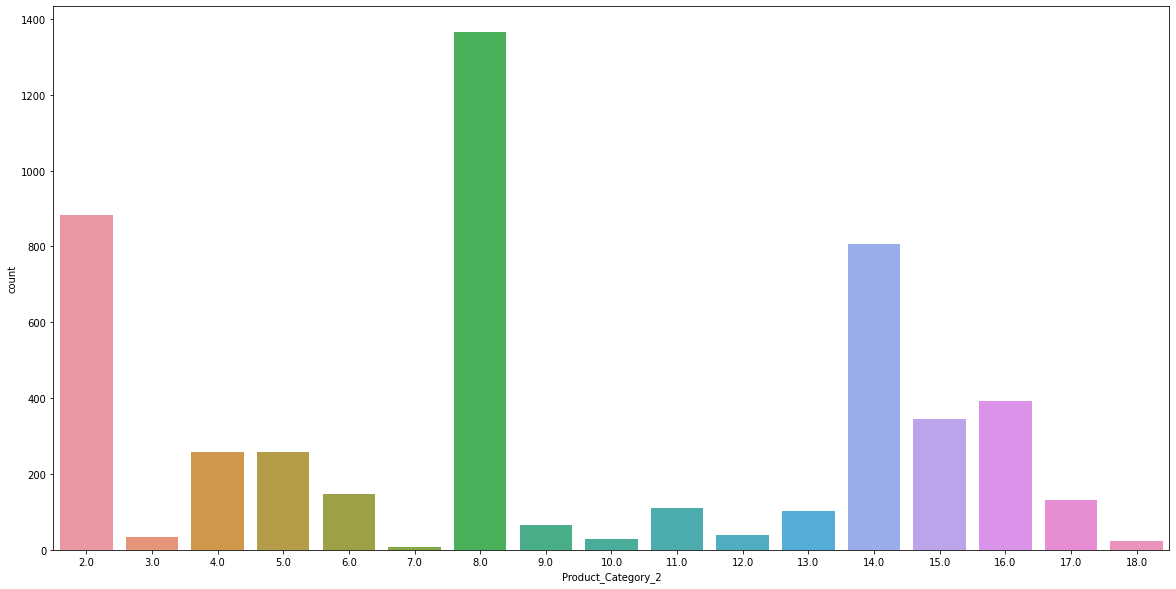

In [ ]:
# Product_Category_2
plt.figure(figsize=(20,10))
sns.countplot(x = 'Product_Category_2',data = df_1)

**Output**

`Product_Category_2`에서는 2, 8, 14의 개수가 가장 많다.

(2) One-hot Encoding

In [ ]:
# 범주형 자료 확인
cate_cols = []
for column in data.columns:
    if data[column].dtype == object:
        cate_cols.append(column)
        print('##########################################################')
        print(f'{column} : {data[column].unique()}')
        print(f'{data[column].value_counts()}')
        print()
        
print()
print(f'Number of categorical column : {len(cate_cols)}')

##########################################################
Product_ID : ['P00046042' 'P00347742' 'P00048942' ... 'P00267142' 'P00085842'
 'P00358242']
P00265242    21
P00220442    16
P00114942    15
P00010742    15
P00148642    15
             ..
P00072342     1
P00037842     1
P00207042     1
P00129742     1
P00358242     1
Name: Product_ID, Length: 1797, dtype: int64

##########################################################
Gender : ['F' 'M']
M    3765
F    1233
Name: Gender, dtype: int64

##########################################################
Age : ['0-17' '18-25' '26-35' '36-45' '46-50' '51-55' '55+']
26-35    1996
36-45    1000
18-25     906
46-50     414
51-55     350
55+       195
0-17      137
Name: Age, dtype: int64

##########################################################
City_Category : ['A' 'B' 'C']
B    2102
C    1555
A    1341
Name: City_Category, dtype: int64

##########################################################
Stay_In_Current_City_Years : ['3' '1' '2' '4+

**Output**

`Product_ID`, `Gender, Age`, `Occupation`, `City_Category`, `Stay_In_Current_City_Years`, `Product_Category_1`, `Product_Category_2`에 대해 One-hot Encoding을 진행해야한다.
- `Product_ID` 제외한 항목들 : One-hot Encoding 그대로 진행
- `Product_ID` : 앞에서 그룹화한 방식대로 One-hot Encoding 진행

In [ ]:
# One-hot Encoding (Product_ID 제외)

categorical_1 = ['Gender', 'Age', 'Occupation', 'City_Category', 
                 'Stay_In_Current_City_Years', 'Product_Category_1', 'Product_Category_2']

encoder_1 = OneHotEncoder().fit(df_1[categorical_1])

encoder_1.get_feature_names(categorical_1)

array(['Gender_F', 'Gender_M', 'Age_0-17', 'Age_18-25', 'Age_26-35',
       'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+', 'Occupation_0',
       'Occupation_1', 'Occupation_2', 'Occupation_3', 'Occupation_4',
       'Occupation_5', 'Occupation_6', 'Occupation_7', 'Occupation_8',
       'Occupation_9', 'Occupation_10', 'Occupation_11', 'Occupation_12',
       'Occupation_13', 'Occupation_14', 'Occupation_15', 'Occupation_16',
       'Occupation_17', 'Occupation_18', 'Occupation_19', 'Occupation_20',
       'City_Category_A', 'City_Category_B', 'City_Category_C',
       'Stay_In_Current_City_Years_0', 'Stay_In_Current_City_Years_1',
       'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3',
       'Stay_In_Current_City_Years_4+', 'Product_Category_1_1',
       'Product_Category_1_2', 'Product_Category_1_3',
       'Product_Category_1_4', 'Product_Category_1_5',
       'Product_Category_1_6', 'Product_Category_1_7',
       'Product_Category_1_8', 'Product_Category_1_9',
  

In [ ]:
# One-hot Encoding (Product_ID)

for i in P003_index:     
    df_1.iloc[i, 0] = 3
for i in P000_index:
    df_1.iloc[i, 0] = 0
for i in P002_index:
    df_1.iloc[i, 0] = 2
for i in P009_index:
    df_1.iloc[i, 0] = 9
for i in P001_index:
    df_1.iloc[i, 0] = 1

encoder_2 = OneHotEncoder().fit(df_1[['Product_ID']])

encoder_2.get_feature_names(['Product_ID'])

array(['Product_ID_0', 'Product_ID_1', 'Product_ID_2', 'Product_ID_3',
       'Product_ID_9'], dtype=object)

In [ ]:
# 최종 Dataframe 병합

# One-hot Encoding (Product_ID 제외)을 Dataframe으로 변환
endcoded_data_1 = pd.DataFrame(encoder_1.transform(df_1[categorical_1]).toarray(),
                               index = df_1.index,
                               columns = encoder_1.get_feature_names(categorical_1))  

# One-hot Encoding (Product_ID)을 Dataframe으로 변환
endcoded_data_2 = pd.DataFrame(encoder_2.transform(df_1[['Product_ID']]).toarray(),
                               index = df_1.index,
                               columns = encoder_2.get_feature_names(['Product_ID']))

df_2 = pd.concat([df_1, endcoded_data_1], sort = False, axis = 1)
df_3 = pd.concat([df_2, endcoded_data_2], sort = False, axis = 1)

# 위에서 만들어진 DataFrame과 기존 DataFrame concat한 후, One-Hot-Encoding 이전 Categorical Column들은 drop 진행
df_3 = df_3.drop(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
                  'Stay_In_Current_City_Years', 'Product_Category_1', 'Product_Category_2'], axis = 1)

df_3

,Marital_Status,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,...,Product_Category_2_14.0,Product_Category_2_15.0,Product_Category_2_16.0,Product_Category_2_17.0,Product_Category_2_18.0,Product_ID_0,Product_ID_1,Product_ID_2,Product_ID_3,Product_ID_9
0,0,2010,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,4483,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,7696,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,16429,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,5780,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,1,11701,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4994,1,2045,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4995,1,4505,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4996,1,1413,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Marital_Status                 4998 non-null   int64  
 1   Purchase                       4998 non-null   int64  
 2   Gender_F                       4998 non-null   float64
 3   Gender_M                       4998 non-null   float64
 4   Age_0-17                       4998 non-null   float64
 5   Age_18-25                      4998 non-null   float64
 6   Age_26-35                      4998 non-null   float64
 7   Age_36-45                      4998 non-null   float64
 8   Age_46-50                      4998 non-null   float64
 9   Age_51-55                      4998 non-null   float64
 10  Age_55+                        4998 non-null   float64
 11  Occupation_0                   4998 non-null   float64
 12  Occupation_1                   4998 non-null   f

**Output**

`Product_ID`, `Gender, Age`, `Occupation`, `City_Category`, `Stay_In_Current_City_Years`, `Product_Category_1`, `Product_Category_2`에 대해 모두 0 또는 1의 값으로 변환된 것을 확인할 수 있다.

## 2. KNN 구현 & 파라미터 튜닝

### 2-1. 데이터 분리하기

전체 Data 중 약 75%를 train Data로, 나머지 25%를 test Data로 분리한다.

In [ ]:
# 설명변수, Target 변수 분리하기
X = df_3.drop(['Purchase'], axis = 1)
y = df_3.Purchase 

In [ ]:
X.head()

,Marital_Status,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,...,Product_Category_2_14.0,Product_Category_2_15.0,Product_Category_2_16.0,Product_Category_2_17.0,Product_Category_2_18.0,Product_ID_0,Product_ID_1,Product_ID_2,Product_ID_3,Product_ID_9
0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
y.tail()

4993    11701
4994     2045
4995     4505
4996     1413
4997     7182
Name: Purchase, dtype: int64

In [ ]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 

print(X_train.shape)
print(X_test.shape)

(3748, 81)
(1250, 81)


### 2-2. 하이퍼파라미터 튜닝하기

(1) Distance type 결정하기

**Euclidean Distance**

: 대응되는 x, y 값 간 차이 제곱합의 제곱근으로써, 두 관측치 사이의 직선 거리를 의미
- 가장 흔히 사용되는 거리측도

$$ d_{(X,Y)}=\sqrt{\sum_{i=1}^n(x_i-y_i)^2}$$

(2) 하이퍼파라미터 K값 결정하기

- K값의 변화에 따른 train accuracy, test accuracy 살펴보기

In [ ]:
k_range = range(1, 31)
train_accuracy = []
test_accuracy = []

for k in tqdm_notebook(k_range):
    reg = KNeighborsRegressor(n_neighbors = k)  
    reg.fit(X_train, y_train)
    train_accuracy.append(reg.score(X_train, y_train))
    test_accuracy.append(reg.score(X_test, y_test))

  0%|          | 0/30 [00:00<?, ?it/s]

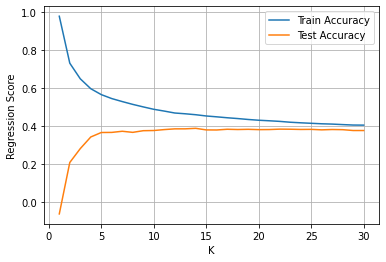

In [ ]:
plt.plot(k_range, train_accuracy, label = "Train Accuracy")
plt.plot(k_range, test_accuracy, label = "Test Accuracy")
plt.xlabel("K")
plt.ylabel("Regression Score")
plt.grid()
plt.legend()
plt.show()

**Output**

- Train Data에 대해서는 K가 커질수록 결정계수가 떨어진다.
- Test Data에 대해서는 K가 커질수록 결정계수가 높아진다.

- 최적 하이퍼파라미터 K값 찾기

In [ ]:
train_rank_15 = pd.Series(train_accuracy).sort_values(ascending = False).index[:15]
test_rank_15 = pd.Series(test_accuracy).sort_values(ascending = False).index[:15]

print(train_rank_15)
print(test_rank_15)
print()
print(train_rank_15.intersection(test_rank_15))

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')
Int64Index([13, 12, 11, 21, 22, 16, 18, 24, 23, 26, 17, 20, 10, 19, 27], dtype='int64')

Int64Index([10, 11, 12, 13], dtype='int64')


**Output**

K가 **12, 13, 14, 15** 일 때, train_accuracy와 test_accuracy 모두에서 상위 50% 안에 든다.

## 3. Evaluation

`sklearn`을 이용하여 교차 검증을 진행한다. 

In [ ]:
cv_scores = []

for k in tqdm_notebook(k_range):
    cv_reg = KNeighborsRegressor(n_neighbors = k)
    scores = cross_val_score(cv_reg, X_train, y_train)
    cv_scores.append(scores.mean())

  0%|          | 0/30 [00:00<?, ?it/s]

In [ ]:
max_acc = np.max(cv_scores)    

best_k = [k_range[i] for i in range(len(cv_scores))
         if cv_scores[i] == max_acc]

print(max_acc)
print("Besk K Value :", best_k)

0.36692663525067315
Besk K Value : [18]


In [ ]:
# 정확도가 높은 K값 추출
pd.Series(cv_scores).sort_values(ascending = False).index[:9] + 1 

Int64Index([18, 17, 16, 20, 15, 19, 14, 21, 22], dtype='int64')

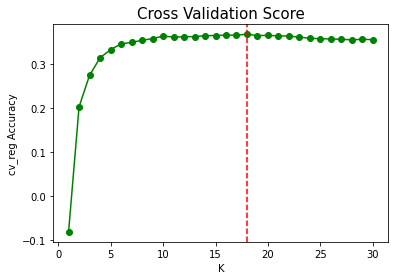

In [ ]:
plt.plot(k_range, cv_scores, 'go-')
plt.title("Cross Validation Score", fontsize = 15)
plt.xlabel("K")
plt.ylabel("cv_reg Accuracy")
plt.axvline(best_k[0], color = "r", linestyle = "--")
plt.show()

**Output**

- 교차 검증 결과, 상위 30% 안에 드는 K값은 **18, 17, 16, 20, 15, 19, 14, 21, 22**이다. 
- **K = 18**일 때 Accuracy가 가장 높다.
- 최적의 K는 12, 13, 14, 15였는데, Cross Validation Score를 시각화한 그래프를 보면 K가 18일 때와 큰 차이가 보이지 않음을 알 수 있다.